In [1]:
import pandas as pd
import numpy as np
from text_to_num import text2num


In [2]:
df = pd.read_csv('./MAU_events_chapter_1.csv')
df

,Unnamed: 0,phoneme,onset,duration,kind,low,high,mid,labial,glottal,velar,vowel,plosive,fricative,nasal,approximant,trill,voice,voiced_vowel,word
0,0,l,3.00,0.06,phoneme,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
1,1,O,3.06,0.13,phoneme,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
2,2,R,3.19,0.03,phoneme,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
3,3,s,3.22,0.09,phoneme,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN
4,4,k,3.31,0.06,phoneme,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6357,6357,NaN,609.49,0.14,word,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,peut
6358,6358,NaN,609.63,0.17,word,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pas
6359,6359,NaN,609.88,0.14,word,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aller
6360,6360,NaN,610.02,0.18,word,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bien


In [3]:
chr_df = pd.read_csv('allwords.csv',sep='\t',names = ['word', 'sentence_id'])
chr_df

,word,sentence_id
0,lorsque,1
1,j'avais,1
2,six,1
3,ans,1
4,j'ai,1
...,...,...
13932,que,1502
13933,ça,1502
13934,a,1502
13935,tellement,1502


In [4]:
count_chr = 0
start = df.query("kind=='word'")["onset"].idxmin()
end = start + len(df.query("kind=='word'"))
count_df = start
while count_df < end:
    
    word =  df.at[count_df, 'word']
    chr_word = chr_df.at[count_chr,'word']
    print(word)
    print(chr_word)
    if word == chr_word.strip('-'):
        df.at[count_df, 'sentence_id'] = chr_df.at[count_chr,'sentence_id']  # TOFIX sentence_id?
        count_df +=1
        count_chr += 1
    
    elif word in chr_word.strip('-'):  #  "l", "avais" in "l'avais"
        df.at[count_df, 'sentence_id'] = chr_df.at[count_chr,'sentence_id']  # TOFIX sentence_id?
        count_df +=1
        word =  df.at[count_df, 'word']
        assert word in chr_word
        
        df.at[count_df, 'sentence_id'] = chr_df.at[count_chr,'sentence_id']  # TOFIX sentence_id?
        
        count_df += 1
        count_chr += 1
    elif str(text2num(word, lang='fr')) == str(chr_word):
        df.at[count_df, 'sentence_id'] = chr_df.at[count_chr,'sentence_id']  # TOFIX sentence_id?
        count_df +=1
        count_chr += 1
        
    else:
        print(word)
        print(chr_word)
        raise ValueError
        

        


lorsque
lorsque
j'avais
j'avais
six
six
ans
ans
j'ai
j'ai
vu
vu
une
une
fois
fois
une
une
magnifique
magnifique
image
image
dans
dans
un
un
livre
livre
sur
sur
la
la
forêt
forêt
vierge
vierge
qui
qui
s'appelait
s'appelait
histoires
histoires
vécues
vécues
ça
ça
représentait
représentait
un
un
serpent
serpent
boa
boa
qui
qui
avalait
avalait
un
un
fauve
fauve
voilà
voilà
la
la
copie
copie
du
du
dessin
dessin
on
on
disait
disait
dans
dans
le
le
livre
livre
les
les
serpents
serpents
boas
boas
avalent
avalent
leur
leur
proie
proie
tout
tout
entière
entière
sans
sans
la
la
mâcher
mâcher
ensuite
ensuite
ils
ils
ne
ne
peuvent
peuvent
plus
plus
bouger
bouger
et
et
ils
ils
dorment
dorment
pendant
pendant
les
les
six
six
mois
mois
de
de
leur
leur
digestion
digestion
j'ai
j'ai
alors
alors
beaucoup
beaucoup
réfléchi
réfléchi
sur
sur
les
les
aventures
aventures
de
de
la
la
jungle
jungle
et
et
à
à
mon
mon
tour
tour
j'ai
j'ai
réussi
réussi
avec
avec
un
un
crayon
crayon
de
de
couleur
couleur
à
à
tracer

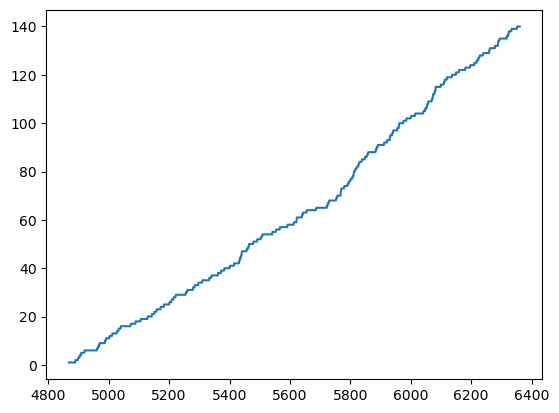

In [5]:
import matplotlib.pyplot as plt
y = df.query("kind=='word'")['sentence_id']
x = df.query("kind=='word'").index
plt.plot(x,y)

In [6]:
chr_df = pd.read_csv('allwords.csv',sep='\t',names = ['word', 'sentence_id'])
count_chr = 0
for run in np.arange(1,10):
    print(f"Run {run} on going\n")
    df = pd.read_csv(f'linnea/MAU_events_chapter_{run}.csv')
    if run == 2:
        # KIll les baobabs
        df.drop(index=[6788,6789],inplace=True)
        df.reset_index(inplace=True)
    if run == 3: 
        df.drop(index=[7220,7221,7222,7223,7224,7225,7226],inplace=True)
        df.reset_index(inplace=True)
    if run == 5:
        df.drop(index=[5537,5538,5539,5540,5541,5542],inplace=True)
        df.reset_index(inplace=True)
        
    start = df.query("kind=='word'")["onset"].idxmin()
    end = start + len(df.query("kind=='word'"))
    count_df = start
    while count_df < end:

        word =  df.at[count_df, 'word']
        chr_word = chr_df.at[count_chr,'word']
        print(word,chr_word,run)
        print(count_df,count_chr)
        if word == chr_word.strip('-'):
            df.at[count_df, 'sentence_id'] = chr_df.at[count_chr,'sentence_id']  # TOFIX sentence_id?
            count_df +=1
            count_chr += 1

        elif word in chr_word.strip('-'):  #  "l", "avais" in "l'avais"
            df.at[count_df, 'sentence_id'] = chr_df.at[count_chr,'sentence_id']  # TOFIX sentence_id?
            count_df +=1
            word =  df.at[count_df, 'word']
            assert word in chr_word

            df.at[count_df, 'sentence_id'] = chr_df.at[count_chr,'sentence_id']  # TOFIX sentence_id?

            count_df += 1
            count_chr += 1
        elif str(text2num(word.replace('-',' '), lang='fr')) == str(chr_word):
            df.at[count_df, 'sentence_id'] = chr_df.at[count_chr,'sentence_id']  # TOFIX sentence_id?
            count_df +=1
            count_chr += 1

        else:
            raise ValueError

            

    

Run 1 on going

lorsque lorsque 1
4868 0
j'avais j'avais 1
4869 1
six six 1
4870 2
ans ans 1
4871 3
j'ai j'ai 1
4872 4
vu vu 1
4873 5
une une 1
4874 6
fois fois 1
4875 7
une une 1
4876 8
magnifique magnifique 1
4877 9
image image 1
4878 10
dans dans 1
4879 11
un un 1
4880 12
livre livre 1
4881 13
sur sur 1
4882 14
la la 1
4883 15
forêt forêt 1
4884 16
vierge vierge 1
4885 17
qui qui 1
4886 18
s'appelait s'appelait 1
4887 19
histoires histoires 1
4888 20
vécues vécues 1
4889 21
ça ça 1
4890 22
représentait représentait 1
4891 23
un un 1
4892 24
serpent serpent 1
4893 25
boa boa 1
4894 26
qui qui 1
4895 27
avalait avalait 1
4896 28
un un 1
4897 29
fauve fauve 1
4898 30
voilà voilà 1
4899 31
la la 1
4900 32
copie copie 1
4901 33
du du 1
4902 34
dessin dessin 1
4903 35
on on 1
4904 36
disait disait 1
4905 37
dans dans 1
4906 38
le le 1
4907 39
livre livre 1
4908 40
les les 1
4909 41
serpents serpents 1
4910 42
boas boas 1
4911 43
avalent avalent 1
4912 44
leur leur 1
4913 45
proie proie 1


obéi obéi 4
5857 5505
le le 4
5858 5506
petit petit 4
5859 5507
prince prince 4
5860 5508
bâilla bâilla 4
5861 5509
il il 4
5862 5510
regrettait regrettait 4
5863 5511
son son 4
5864 5512
coucher coucher 4
5865 5513
de de 4
5866 5514
soleil soleil 4
5867 5515
manqué manqué 4
5868 5516
et et 4
5869 5517
puis puis 4
5870 5518
il il 4
5871 5519
s'ennuyait s'ennuyait 4
5872 5520
déjà déjà 4
5873 5521
un un 4
5874 5522
peu peu 4
5875 5523
je je 4
5876 5524
n'ai n'ai 4
5877 5525
plus plus 4
5878 5526
rien rien 4
5879 5527
à à 4
5880 5528
faire faire 4
5881 5529
ici ici 4
5882 5530
dit-il dit-il 4
5883 5531
au au 4
5884 5532
roi roi 4
5885 5533
je je 4
5886 5534
vais vais 4
5887 5535
repartir repartir 4
5888 5536
ne -ne 4
5889 5537
pars pars 4
5890 5538
pas pas 4
5891 5539
répondit répondit 4
5892 5540
le le 4
5893 5541
roi roi 4
5894 5542
qui qui 4
5895 5543
était était 4
5896 5544
si si 4
5897 5545
fier fier 4
5898 5546
d d'avoir 4
5899 5547
un un 4
5901 5548
sujet sujet 4
5902 5549
ne ne 4

ValueError: invalid literal for text2num: 'Tu'

In [ ]:
off = 10

In [ ]:
df.iloc[7102-off:7102+off]

In [ ]:
chr_df.iloc[9048-off:9048+off]